Vaccine response heatmap figure plus additional vaccine response figures for supplement

#### Set up

In [11]:
import os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('ticks')

In [2]:
data_path = '../data/'
metadata_path = '../data/metadata/'
plot_path = '../figures/'

#### Participant metadata

In [4]:
participant_md = pd.read_csv(os.path.join(metadata_path, 'participants.tsv'), sep='\t', index_col=0)
participant_md['Date of Birth'] = pd.to_datetime(participant_md['Date of Birth'])
participant_md.head()

,Subject ID,Date of Birth,Gender,Birth Height (cm),Birth Height Percentile,Birth Weight (kg),Birth Weight Percentile,Birth Head Cir. (cm),Birth Head Cir. Percentile,Race #1,...,Amphibian/Reptile,Bird,Other,Live on Farm?,Smokers at home?,Any medical conditions/signs/symptoms prior to study?,Condition #1,Past or Current?,Condition #2,Past or Current?.1
PrimaryKey,,,,,,,,,,,,,,,,,,,,,
Baby101,101,2018-01-24,Male,Not Documented,Not Documented,3.646,Not Documented,Not Documented,Not Documented,White/Caucasian,...,NaN,NaN,NaN,No,No,Yes,Nevus,Current,NaN,NaN
Baby102,102,2018-02-20,Male,50,50,3.35,37,34.5,25,Arab/North African,...,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN
Baby103,103,2018-02-21,Female,52,84,3.41,51,36.5,85,White/Caucasian,...,NaN,NaN,NaN,No,No,Yes,broken collar bone,Current,NaN,NaN
Baby104,104,2018-03-12,Female,55.2,98,3.615,61,35.6,64,White/Caucasian,...,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN
Baby105,105,2018-03-30,Female,50.8,72.31,3.97,89.09,34,32.73,White/Caucasian,...,NaN,NaN,pigs,No,No,Yes,Jaundice,Current,NaN,NaN


#### Vaccine response data

In [6]:
vaccineresponse_y1 = pd.read_table(os.path.join(data_path, 'vaccine_response', 'vaccine_response_y1.tsv'))
display(vaccineresponse_y1.head())
print(vaccineresponse_y1.shape)

,BabyN,PT,Dip,FHA,PRN,TET,PRP (Hib),PCV ST1,PCV ST3,PCV ST4,...,median_mmNorm,median_mmNorm_DTAPHib,median_mmNorm_PCV,PT_protected,Dip_protected,FHA_protected,PRN_protected,TET_protected,PRP (Hib)_protected,VR_group
0,Baby106,2.5,0.21,11.0,2.5,0.30,0.39,141.0,35.0,56.0,...,0.061955,0.052874,0.061955,False,True,True,False,True,True,NVR
1,Baby107,2.5,0.44,3.0,9.0,0.52,1.60,2430.0,415.0,194.0,...,0.449483,0.114018,0.958142,False,True,False,True,True,True,NVR
2,Baby108,2.5,0.05,1.5,2.5,0.05,0.27,21.0,3.0,24.0,...,0.000000,0.000000,0.003102,False,False,False,False,False,True,LVR
3,Baby109,27.0,NaN,NaN,63.0,1.35,7.02,NaN,NaN,NaN,...,0.700925,0.763049,0.486810,True,False,False,True,True,True,NVR
4,Baby110,14.0,0.24,15.0,20.0,2.45,NaN,301.0,63.0,400.0,...,0.266219,0.284211,0.245121,True,True,True,True,True,False,NVR


(72, 49)


#### Set up data for a heatmap

In [7]:
# get the antigens in the order we want to show them, DTaP/Hib then PCV
ags = ['PT','Dip','FHA','PRN','TET','PRP (Hib)',
       'PCV ST1','PCV ST3','PCV ST4','PCV ST5',
       'PCV ST6A', 'PCV ST6B', 'PCV ST7F',
       'PCV ST9V', 'PCV ST14', 'PCV ST18C', 
       'PCV ST19A', 'PCV ST19F', 'PCV ST23F']

cols_to_use = [a+'_mmNorm' for a in ags] # want to plot the min-max normalised values for each of the antigens
cols_to_use.append('VR_group') # also need the VR group for annotation on the heatmap
cols_to_use.extend(['median_mmNorm','median_mmNorm_DTAPHib','median_mmNorm_PCV'])
median_names = ['Median (cross-vaccine)', 'Median (DTaP/Hib)', 'Median (PCV)']

for_heatmap = vaccineresponse_y1.set_index('BabyN')[cols_to_use]

# # sort this dataframe for plotting -- WAS DOING THIS INSTEAD OF CLUSTERING, DON'T NOW
# for_heatmap['median'] = for_heatmap.drop('VR_group', axis=1).median(axis=1) # create a median column
# for_heatmap.sort_values(['VR_group','median'], inplace=True) # sort by VR group then by median within group
# for_heatmap.drop('median', axis=1, inplace=True) # drop the median column now we're done with it

In [8]:
for_heatmap

,PT_mmNorm,Dip_mmNorm,FHA_mmNorm,PRN_mmNorm,TET_mmNorm,PRP (Hib)_mmNorm,PCV ST1_mmNorm,PCV ST3_mmNorm,PCV ST4_mmNorm,PCV ST5_mmNorm,...,PCV ST9V_mmNorm,PCV ST14_mmNorm,PCV ST18C_mmNorm,PCV ST19A_mmNorm,PCV ST19F_mmNorm,PCV ST23F_mmNorm,VR_group,median_mmNorm,median_mmNorm_DTAPHib,median_mmNorm_PCV
BabyN,,,,,,,,,,,,,,,,,,,,,
Baby106,0.000000,0.16,0.200000,0.000000,0.072254,0.033493,0.054483,0.039531,0.068699,0.141276,...,0.147975,0.078806,0.015527,0.054392,0.069508,0.011956,NVR,0.061955,0.052874,0.061955
Baby107,0.000000,0.39,0.031579,0.092199,0.135838,0.149282,1.000000,0.508966,0.263131,0.381956,...,0.916284,NaN,1.000000,1.000000,0.697458,1.000000,NVR,0.449483,0.114018,0.958142
Baby108,0.000000,0.00,0.000000,0.000000,0.000000,0.022010,0.004914,0.000000,0.023613,0.019065,...,0.004015,0.000000,0.000000,0.000000,0.006536,0.003040,LVR,0.000000,0.000000,0.003102
Baby109,1.000000,NaN,NaN,0.858156,0.375723,0.667943,NaN,NaN,NaN,NaN,...,NaN,0.239712,NaN,NaN,NaN,NaN,NVR,0.700925,0.763049,0.486810
Baby110,0.469388,0.19,0.284211,0.248227,0.693642,NaN,0.120574,0.074121,0.553370,0.328333,...,0.230126,0.350365,0.089464,0.100698,0.245121,0.425329,NVR,0.266219,0.284211,0.245121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Baby260,0.102041,0.73,0.221053,0.106383,0.141618,0.128230,0.054782,0.131898,0.274706,0.245670,...,0.180665,0.062003,0.074247,0.056634,0.119689,0.107244,NVR,0.128230,0.134924,0.119689
Baby261,0.183673,0.53,0.284211,0.035461,0.141618,0.061244,0.010101,0.019750,0.017659,0.000000,...,0.051258,0.074202,0.007328,0.005320,0.015398,0.004489,NVR,0.019750,0.162646,0.010101
Baby263,0.000000,0.28,0.000000,0.000000,0.031792,0.044976,0.128958,0.087718,0.134037,0.443909,...,0.186407,0.370840,0.118591,0.127112,0.117180,0.137121,NVR,0.128958,0.015896,0.137121


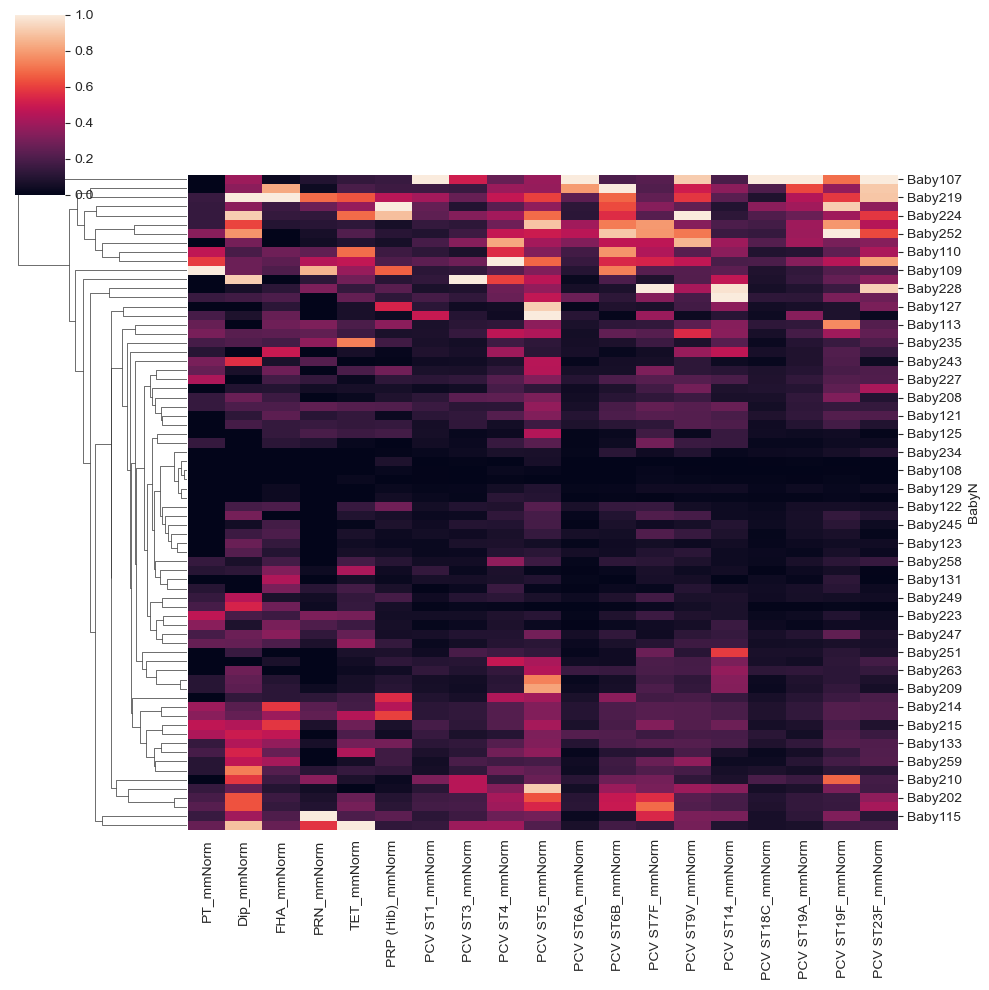

In [9]:
# Clustering the rows of this dataframe
# - using seaborn's clustermap
# - clustering on all ag titers, dropping VR group and medians
# - where data is missing, fill with the mean for that antigen
# - reorder the data table to put into the heatmap by the row cluster order 

to_cluster = for_heatmap.drop('VR_group',axis=1).drop([c for c in for_heatmap.columns if 'median' in c],axis=1)
to_cluster = to_cluster.fillna(to_cluster.mean())

g = sns.clustermap(to_cluster,
                   col_cluster=False)
# plt.close() # don't show this ugly thing, was just using it for the dendrogram order
clustered_row_order = g.dendrogram_row.reordered_ind
# print(clustered_row_order)
# display(for_heatmap)
# display(for_heatmap.iloc[clustered_row_order])

# re-order the heatmap data table to have the kids in this clustered order
for_heatmap = for_heatmap.iloc[clustered_row_order]

#### Plot heatmap

In [14]:
# # make the figure
# fig, (a0, a1, a2) = plt.subplots(1,3, # 1 row, 3 columns
#                                  gridspec_kw={'width_ratios': [1,3,19]}, # a0 will be an axis for VR groupings, a1 will be for medians, a2 will be for individual antigens
#                                  figsize=(8,6))
# # Heatmap of medians
# hm1 = sns.heatmap(for_heatmap.drop([c for c in for_heatmap.columns if 'median' not in c], axis=1), # drop anythign other than medians
#                   ax=a1,
#                   yticklabels=False,
#                   xticklabels=median_names,
#                   linewidth=1,
#                   cmap='YlOrRd', vmin=0, vmax=1, cbar=False)
# # Heatmap admin
# hm1.set_ylabel('')
# hm1.set_facecolor('tab:grey')
# # Heatmap of individual antigens
# hm2 = sns.heatmap(for_heatmap.drop(['VR_group']+[c for c in for_heatmap.columns if 'median' in c], axis=1), # drop the VR group column and median columns before heatmapping
#                   ax=a2,
#                   yticklabels=False, # remove Baby IDs 
#                   xticklabels=ags, # the column headers in the table include _mmNorm but are in this order
#                   linewidth=1,
#                   cmap='YlOrRd', vmin=0, vmax=1, # I have no strong feelings about colour map here - what do people think?
#                   cbar_kws={'label': 'min-max normalised antibody titer'}) 
# # Heatmap admin 
# hm2.set_ylabel('') # remove y label
# hm2.set_facecolor('tab:grey') # for the NAs - do people have strong feelings about this?
# # Annotation with VR group
# VR_to_int = {'LVR':0, 'NVR':1} # heatmap can only take floats and doesn't know how to deal with floats
# VR_cmap = sns.color_palette("tab10", 2) # pull the first two colours from tab10 (blue and orange) for LVR and NVR 
# hm0 = sns.heatmap(for_heatmap[['VR_group']].replace(VR_to_int), # replace LVR/NVR with 0/1
#                   cmap=VR_cmap, # use our 2 colour colormap
#                   ax=a0, 
#                   yticklabels=False,
#                   cbar=False, 
#                   linewidth=1)
# hm0.set_ylabel('')
# hm0.set_xticklabels(['VR group'], rotation=90)
# # Save figure
# plt.tight_layout()
# plt.savefig(os.path.join(plot_path, 'F1_VRresponse_heatmap_clustered.pdf'),
#             dpi=300)

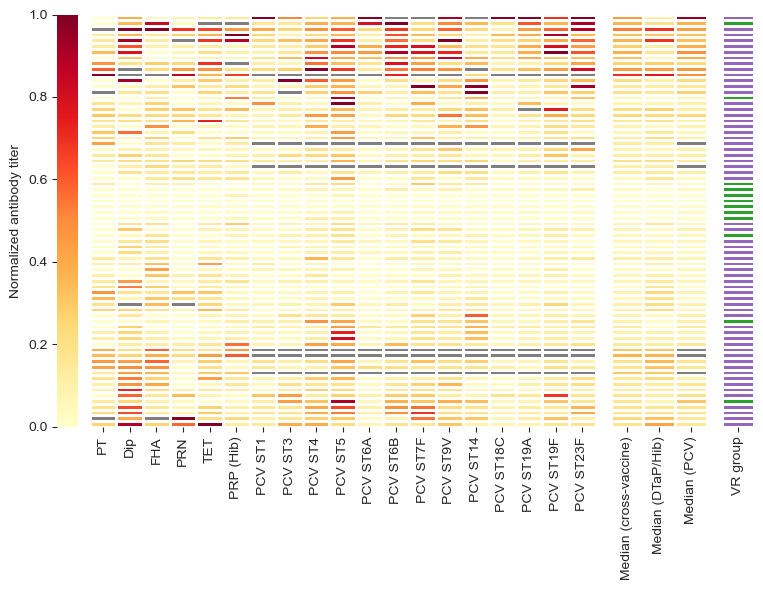

In [13]:
# Change the order of the panels

# make figure
fig, (a0, a1, a2) = plt.subplots(1,3, # 1 row, 3 columns
                                 gridspec_kw={'width_ratios': [19,3,1]}, 
                                 figsize=(8,6))
# a0 will be individual ags, a1 will be for medians, a2 will be for LVR/NVR
                                 
# Heatmap of medians
hm1 = sns.heatmap(for_heatmap.drop([c for c in for_heatmap.columns if 'median' not in c], axis=1), # drop anythign other than medians
                  ax=a1,
                  yticklabels=False,
                  xticklabels=median_names,
                  linewidth=1,
                  cmap='YlOrRd', vmin=0, vmax=1, cbar=False)
# Heatmap admin
hm1.set_ylabel('')
hm1.set_facecolor('tab:grey')
# Heatmap of individual antigens
hm0 = sns.heatmap(for_heatmap.drop(['VR_group']+[c for c in for_heatmap.columns if 'median' in c], axis=1), # drop the VR group column and median columns before heatmapping
                  ax=a0,
                  yticklabels=False, # remove Baby IDs 
                  xticklabels=ags, # the column headers in the table include _mmNorm but are in this order
                  linewidth=1,
                  cmap='YlOrRd', vmin=0, vmax=1, # I have no strong feelings about colour map here - what do people think?
                  cbar_kws={'label':'Normalized antibody titer',
                            'location':'left',
                            'pad':0.02}) 
# Heatmap admin 
hm0.set_ylabel('') # remove y label
hm0.set_facecolor('tab:grey') # for the NAs - do people have strong feelings about this?
# Annotation with VR group
VR_to_int = {'LVR':0, 'NVR':1} # heatmap can only take floats and doesn't know how to deal with floats
# VR_cmap = sns.color_palette("tab10", 2) # pull the first two colours from tab10 (blue and orange) for LVR and NVR 
VR_cmap = [sns.color_palette("tab10",5)[2],sns.color_palette("tab10",5)[4]]
hm2 = sns.heatmap(for_heatmap[['VR_group']].replace(VR_to_int), # replace LVR/NVR with 0/1
                  cmap=VR_cmap, # use our 2 colour colormap
                  ax=a2, 
                  yticklabels=False,
                  cbar=False, 
                  linewidth=1)
hm2.set_ylabel('')
hm2.set_xticklabels(['VR group'], rotation=90)
# Save figure
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'F1_VRresponse_heatmap_clustered.pdf'),
            dpi=600)

#### SUPPLEMENTARY FIGURES

Boxplots of titers for each participant, with boxplot coloured by VR group

In [15]:
# set up data for box plots

DH_ags = ['PT','Dip','FHA','PRN','TET','PRP (Hib)']
PCV_ags = ['PCV ST1','PCV ST3','PCV ST4','PCV ST5',
           'PCV ST6A', 'PCV ST6B', 'PCV ST7F',
           'PCV ST9V', 'PCV ST14', 'PCV ST18C', 
           'PCV ST19A', 'PCV ST19F', 'PCV ST23F']

dtap_bp_dat = vaccineresponse_y1[[a+'_mmNorm' for a in DH_ags]+['BabyN','VR_group']]\
                    .melt(id_vars=['BabyN','VR_group'])
dtap_bp_order = dtap_bp_dat.groupby('BabyN')\
                    .median('value')\
                    .sort_values(by='value', ascending=False)\
                    .index

pcv_bp_dat = vaccineresponse_y1[[a+'_mmNorm' for a in PCV_ags]+['BabyN','VR_group']]\
                    .melt(id_vars=['BabyN','VR_group'])
pcv_bp_order = pcv_bp_dat.groupby('BabyN')\
                    .median('value')\
                    .sort_values(by='value', ascending=False)\
                    .index

allag_bp_dat = vaccineresponse_y1[[a+'_mmNorm' for a in DH_ags+PCV_ags]+['BabyN','VR_group']]\
                    .melt(id_vars=['BabyN','VR_group'])
allag_bp_order = allag_bp_dat.groupby('BabyN')\
                    .median('value')\
                    .sort_values(by='value', ascending=False)\
                    .index

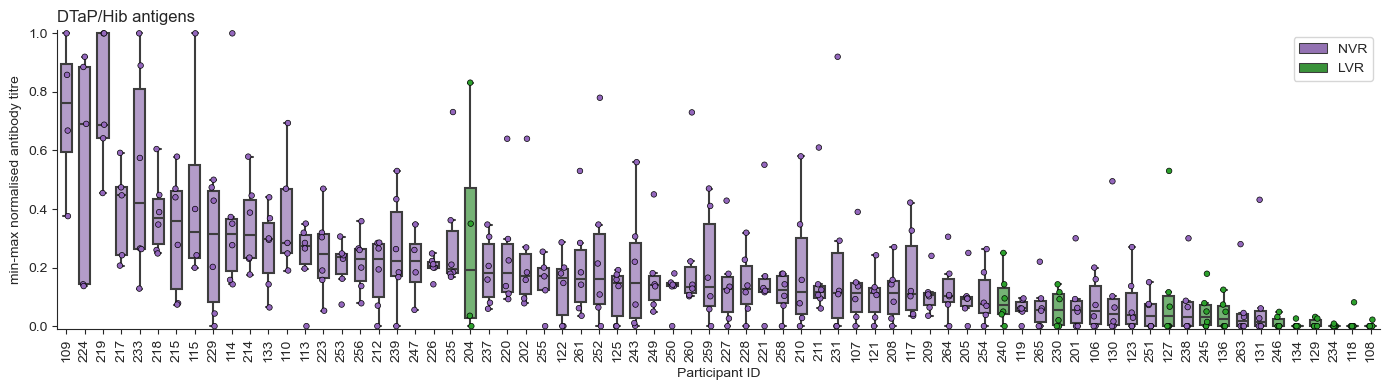

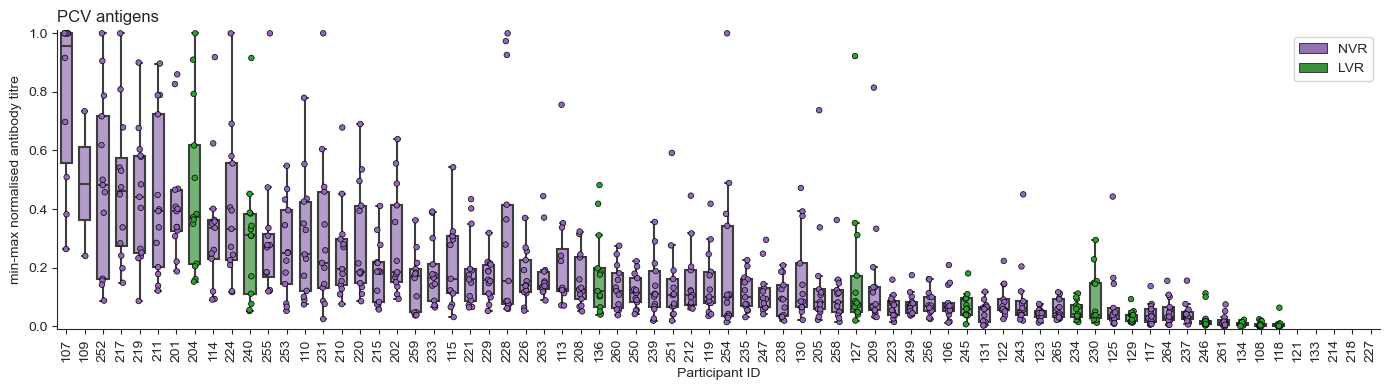

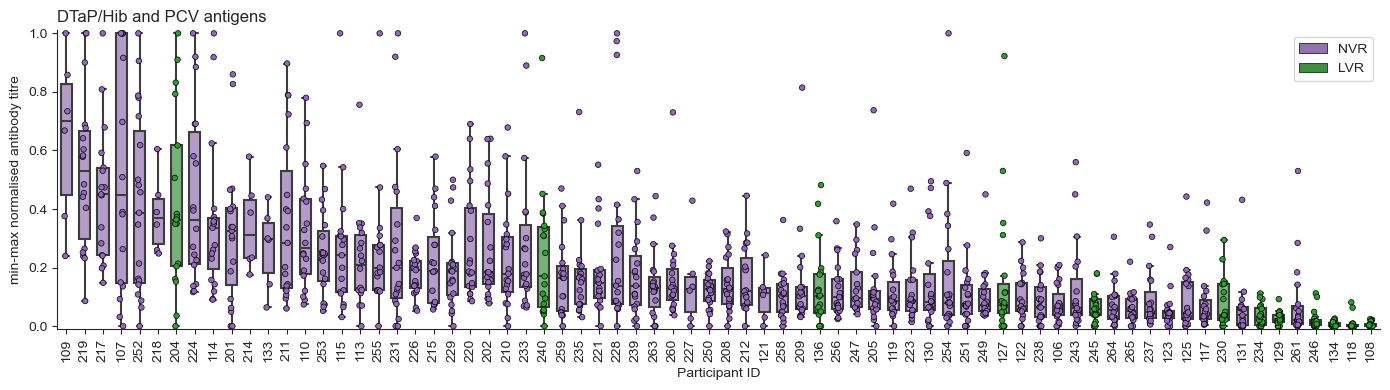

In [16]:
# Plot each of these antigen sets

def make_boxplot(dat, dat_order):
    # set up plot
    fig = plt.figure(figsize=(14,4))
    ax = fig.add_subplot(111)
    # box plot
    sns.boxplot(data=dat, ax=ax,
                x='BabyN', order=dat_order,
                y='value', 
                hue='VR_group', palette={'LVR':'tab:green', 'NVR':'tab:purple'},
                dodge=False, 
                width=0.6, #saturation=0.5,
                showfliers=False)#, legend=False)
    # set alpha on each of the boxes
    for patch in ax.patches:
        r,g,b,a = patch.get_facecolor()
        patch.set_facecolor((r,g,b,.7))
    # scatter points
    sns.stripplot(data=dat, 
                  x='BabyN', order=dat_order,
                  y='value', 
                  hue='VR_group', palette={'LVR':'tab:green', 'NVR':'tab:purple'},
                  s=4, linewidth=0.5, edgecolor='k',
                  ax=ax)
    # antigen-set-agnostic tidying
    ax.set_xticklabels([x.lstrip('Baby') for x in dat_order], rotation=90)
    ax.set_xlabel('Participant ID')
    ax.set_ylabel('min-max normalised antibody titre')
    ax.set_ylim((-0.01,1.01))
    sns.despine()
    # legend - doubled up at the moment (one set for each plot element) - fix
    # also sort the alpha on the boxplot legend
    handles, labels = ax.get_legend_handles_labels()
    for h in handles:
        h.set_alpha(1)
    ax.legend(handles[:2], labels[:2]) # only use the first 2 legend elements
    # return axis for title and saving
    return(fig, ax)

# PLOT DTAP/HIB ANTIGENS ONLY
fig, ax = make_boxplot(dtap_bp_dat, dtap_bp_order)
# title
ax.set_title('DTaP/Hib antigens', loc='left')
# save
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'SuppFig_VRresponse_boxplots_DTaPHib.pdf'),
            dpi=300)

# PLOT PCV ANTIGENS ONLY
fig, ax = make_boxplot(pcv_bp_dat, pcv_bp_order)
# title
ax.set_title('PCV antigens', loc='left')
# save
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'SuppFig_VRresponse_boxplots_PCV.pdf'),
            dpi=300)

# PLOT ALL ANTIGENS
fig, ax = make_boxplot(allag_bp_dat, allag_bp_order)
# title
ax.set_title('DTaP/Hib and PCV antigens', loc='left')
# save
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'SuppFig_VRresponse_boxplots_DTaPHibPCV.pdf'),
            dpi=300)
